The roots are [1. 2.]


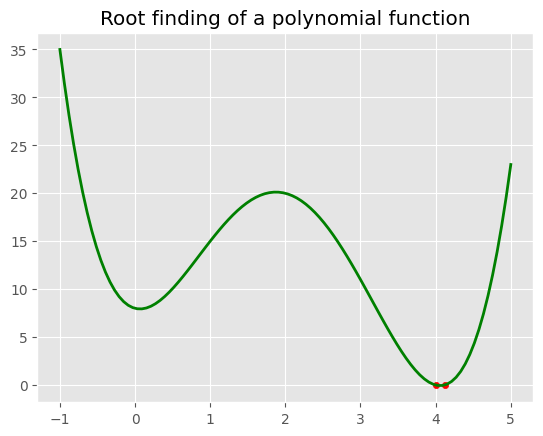

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy.polynomial.polynomial as poly
 
coef = [2, -3, 1] # from low to high
r = poly.polyroots(coef)
print('The roots are {}'.format(r))
 
coef = [8, -2, 16, -8, 1]
r = poly.polyroots(coef)
r_x =np.real(r[np.isreal(r)]) 
x = np.linspace(-1, 5, 100)
y = poly.polyval(x, coef)
 
plt.style.use('ggplot')
plt.plot(x, y, color = 'g', linewidth = 2)
plt.scatter(r_x, [0, 0], s = 20, c = 'r')
plt.grid(True)
plt.title('Root finding of a polynomial function')
plt.show()

In [35]:
import numpy as np
import matplotlib.pyplot as plt 
import numpy.polynomial.polynomial as poly
import scipy.optimize as opt
from scipy.stats import uniform
coef = [8, -2, 16, -8, 1]
r = poly.polyroots(coef)
r_x =np.real(r[np.isreal(r)]) 
print(r_x)

f = lambda x: poly.polyval(x, coef)
n = 20
x0 = uniform.rvs(-2,5,n)

roots = np.zeros(n)

for i in range(n):
    sol = opt.root_scalar(f, x0=x0[i],xtol=1e-8, method='newton')  # method: brentq, brenth, ridder, bisect, newton, secant
    roots[i] = sol.root

roots = np.array(roots)
roots = roots[abs(f(roots)) < 1e-8 ]
roots = np.unique(np.round(roots, 4))
print(roots)


[4.         4.11794227]
[4.     4.1179]


 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.06065979552750811
       x: 4.059791962084551
     nit: 10
    nfev: 13
The function has a local minimum at x = 4.0598
The corresponding function value is -0.0607


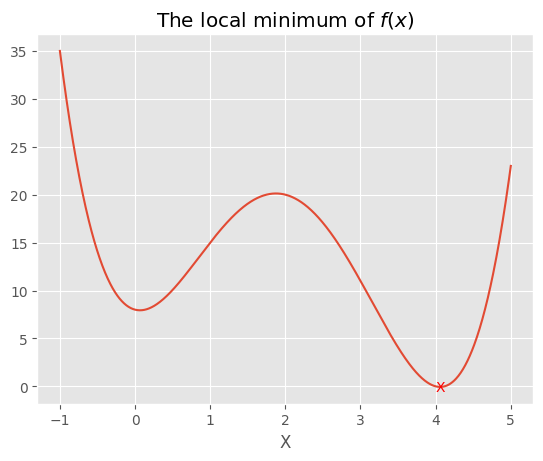

In [39]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
 
# draw the graph
coef = [1, -8, 16, -2, 8] # high to low
f= lambda x : np.polyval(coef, x)
x = np.linspace(-1, 5, 1000)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
 
# compute the local minimum
res = opt.minimize_scalar(f, bracket=[2, 3, 5])
print(res) # find out the return values
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
 
plt.text(res.x, res.fun, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()

$
\displaystyle \min_{x \in (0,3)} \tan^{-1}\frac{5}{x}+\tan^{-1}\frac{2}{3-x}$

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.9827937232468098
       x: -1.1249871717273128e-11
     nit: 55
    nfev: 59
The function has a local minimum at x = -0.0000
The corresponding function value is -0.9828


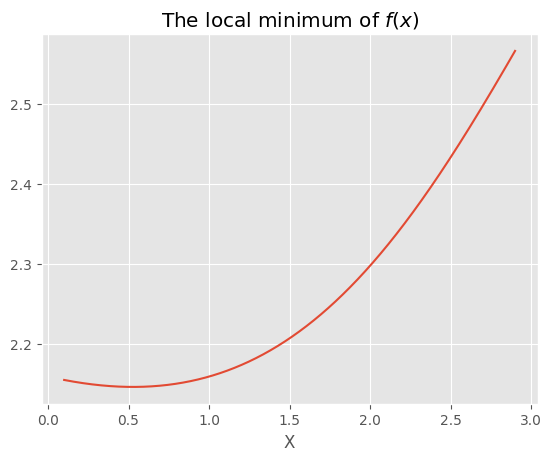

In [51]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
 
# draw the graph
f= lambda x :np.arctan(5/x) + np.arctan(2/(3-x))
x = np.linspace(0.1, 2.9, 1000)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
 
# compute the local minimum
res = opt.minimize_scalar(f, bracket=[0.1, 2])
print(res) # find out the return values
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
 
# plt.text(res.x, res.fun, 'X', color = 'r',
#     horizontalalignment='center',
#     verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()

In [ ]:
from  scipy.stats import norm, expon
import matplotlib.pyplot as plt
import numpy as np


M = 10000
true_1 = 0.5
N = [10,20,30,40,50,60,70,80,90,100]
Mu = np.zeros(len(N))
Std = np.zeros(len(N))

for i in range(len(N)):
    S = expon.rvs(true_1, 1, size=(M,N[i]))
    R = np.mean(M)
    for j in range(M):
        f = lambda l: -(N[j]*np.log(l))
        res = opt.minimize_scalar(f, bracket=[0.1, 5], method='bounded')
        R[i] = res.x
    Mu[i] = np.mean(R)
    Std[i] = np.std(R)